In [1]:
from dataset.dataset import Dataset

X, X_test, y, y_test = Dataset().affnist_dataset()

X.shape, y.shape

((8000, 1600), (8000,))

In [2]:
from models.neural_network import ClassificationNeuralNetwork
from models.optimizer import Optimizer
from models.metrics import CategoricalCrossEntropyLoss, Accuracy

network = ClassificationNeuralNetwork(
    input_dim=1600,
    hidden_dim=800,
    output_dim=10,
    number_of_hidden_layers=1,
)

optimizer = Optimizer(
    network,
    accuracy=Accuracy(),
    loss=CategoricalCrossEntropyLoss(),
    learning_rate=0.85,
    batch_size=128,
    epochs=10,
    reshape=False,
)

optimizer.fit(X, y)

accuracy = optimizer.accuracy
loss = optimizer.loss

Epoch 0  -- accuracy 0.167 - loss 2.245
Epoch 1  -- accuracy 0.211 - loss 2.139
Epoch 2  -- accuracy 0.294 - loss 1.965
Epoch 3  -- accuracy 0.389 - loss 1.715
Epoch 4  -- accuracy 0.486 - loss 1.477
Epoch 5  -- accuracy 0.575 - loss 1.246
Epoch 6  -- accuracy 0.641 - loss 1.051
Epoch 7  -- accuracy 0.726 - loss 0.810
Epoch 8  -- accuracy 0.785 - loss 0.651
Epoch 9  -- accuracy 0.833 - loss 0.502


In [3]:
import matplotlib.pyplot as plt

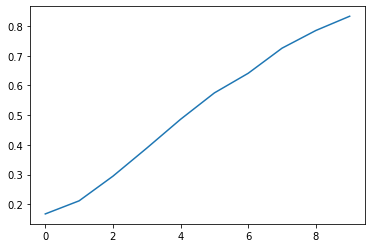

In [4]:
plt.plot(accuracy)
plt.show()

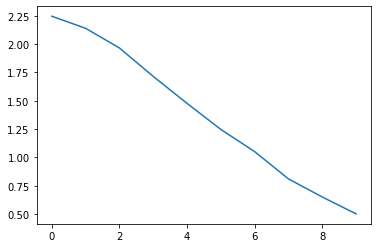

In [5]:
plt.plot(loss)
plt.show()

In [6]:
import numpy as np

acc = Accuracy()
loss = CategoricalCrossEntropyLoss()
test_accuracy = np.mean(
    [
        acc.calculate(network.forward(X_val), y_val)
        for X_val, y_val in zip(X_test, y_test)
    ]
)

f"Model accuracy is {test_accuracy}"

'Model accuracy is 0.668'